# Assignment: Центральная предельная теорема своими руками

## Гистограмма выборки
Будем рассмотривать равномерное распределение случайно величины с  параметрами a = 0 и b =  30. Плотность вероятности для экспоненциального распределения будет иметь следующий вид:

$
f(x) = \begin{cases}
\dfrac{1}{b - a} ,& x \in [a, b], \\
0 ,& x \notin [a,b].
\end{cases}.
$

Пример равномерного распределения в жизни: Пусть X — это время ожидания на светофоре до того, как можно будет
перейти дорогу. Если на светофоре нет счетчика, то нельзя угадать, сколько именно
придется ждать зеленого сигнала. Время ожидания может быть любым числом от 0
до, например, 30 секунд. Именно так устроено равномерное распределение — случайная величина на отрезке [a, b] принимает любое значение с одинаковой вероятностью:

Сгенерируем из него выборку объёма 1000 и сравним гистограмму выборки и с теоретической плотностью распределения случайной величины.

In [25]:
# импорт библиотек
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

In [26]:
# сгенеруем выборку объема 1000 из распределения (rvs - random variates)
rv = sts.uniform(0, 30) 
sample = rv.rvs(1000)

# расчитаем теоритеческую плотность вероятности (pdf - probability density function) для распределения
x = np.linspace(0, 60, 1000)
pdf = rv.pdf(x) 

Text(0,0.5,'$f(x)$')

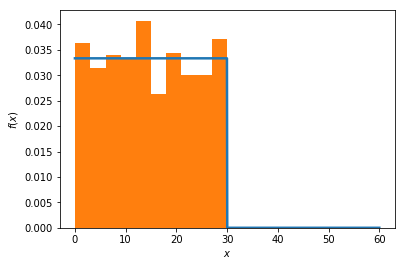

In [27]:
# построим гистограмму выборки и наложим на нее теоретическую 
# оценку плотности вероятности экспоненциального распределения
plt.plot(x, pdf, linewidth = 2.5)
plt.hist(sample, normed = True)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')

Вывод: как видно на графике выше, гистограмма выборки хорошо совпадает с теоретической оценкой плотности вероятности рассматриваемого распределения.


## Распределение выборочных средних

Перейдем к следующему шагу и оценим распределение выборочных средних случайной величины. Согласно Центральной Предельной Теореме выборочные средние  $\bar{X}_n = \frac{1}{n} \sum\limits_{i=1}^n X_i$ будут приближаться нормальным распределением $N(\mu = \mathbb{E}X, \sigma^2 = \frac{\mathbb{D}X}{n})$, где $n$ - объем выборки, $\mathbb{E}X$ и $\mathbb{D}X$ соответственно математическое ожидание и дисперсия рассматриваемого исходного распределения.

В нашем случае равномерного распределения: $\mathbb{E}X = \dfrac{a + b}{2}\, = 15$ - _математическое ожидание_, $\mathbb{D}X = \dfrac{(b - a)^2}{12}\, = 75$ - _дисперсия_.

Таким образом, __распределение выборочных средних экспоненциального распределения__ с $\lambda = 1$ будет приближаться нормальным распределением $N(\mu = 15, \sigma^2 = \frac{75}{n})$.

Опишем функцию, которая для объема выборки n генерирует график гистограммы выборочных средних случайной величины и теоретической оценки плотности вероятности для распределения выборочных средних


In [40]:
def generate_pdf(n): 
    # сгенерируем выборочные средние по выборкам объема n
    means = []
    for _ in range(1000):
        sample = rv.rvs(n)
        sample_mean = np.mean(sample)
        means.append(sample_mean)
        
    # расчитаем теоритеческую плотность вероятности (pdf - probability density function) для нормального распределения
    mu = 15 # theoretical expectation
    sigma = (75./n) ** 0.5 # theoretical sigma
    
    norm_rv = sts.norm(loc=mu, scale=sigma)
    x = np.linspace(0, 60 ,100)
    pdf = norm_rv.pdf(x)
    
    # построим гистограмму выборочных средних и наложим на нее теоретическую 
    # оценку плотности вероятности нормального распределения
    plt.plot(x, pdf, linewidth = 2.5)
    plt.hist(means, normed = True)
    plt.xlabel('$\\bar{X}_n$')
    plt.ylabel('$f(\\bar{X}_n)$')
    plt.title('n = %d' % n)
    plt.show()

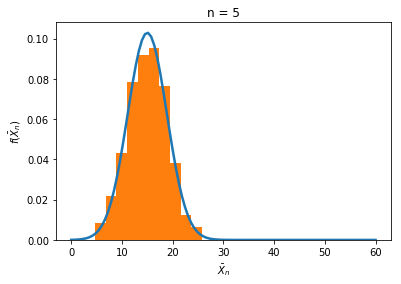

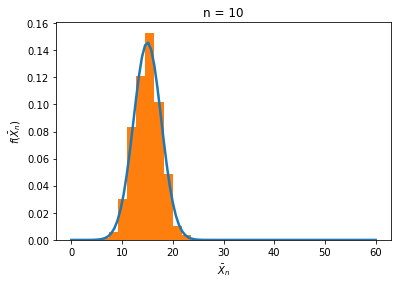

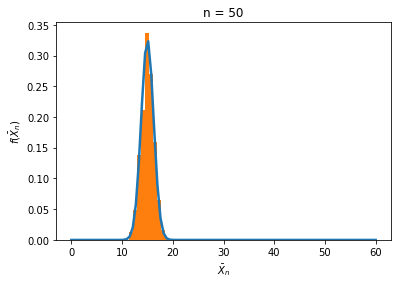

In [43]:
# построим гистограммы распределений выборочных средних и приближающих их нормальных распределений 
# при различных объемах выборок n
for n in [5, 10, 50]:
    generate_pdf(n)

Вывод: Чем больше объем выборки n, тем лучше распределение выборочных средних соответствует приближающему его нормальному распределению.